In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [2]:
data = sm.datasets.sunspots.load_pandas().data

In [3]:
ts = data['SUNACTIVITY']
ts.index = pd.Index(sm.tsa.datetools.dates_from_range('1700', '2008'))

In [4]:
model = sm.tsa.ARIMA(ts, order=(5, 1, 0)) 
results = model.fit()

C:\Users\ASUS\anaconda3\Anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\Anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)
C:\Users\ASUS\anaconda3\Anakonda\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency A-DEC will be used.
  self._init_dates(dates, freq)


In [5]:
forecast_years = pd.Index(sm.tsa.datetools.dates_from_range('2009', '2030'))
forecast = results.predict(start=len(ts), end=len(ts)+len(forecast_years)-1, dynamic=False)

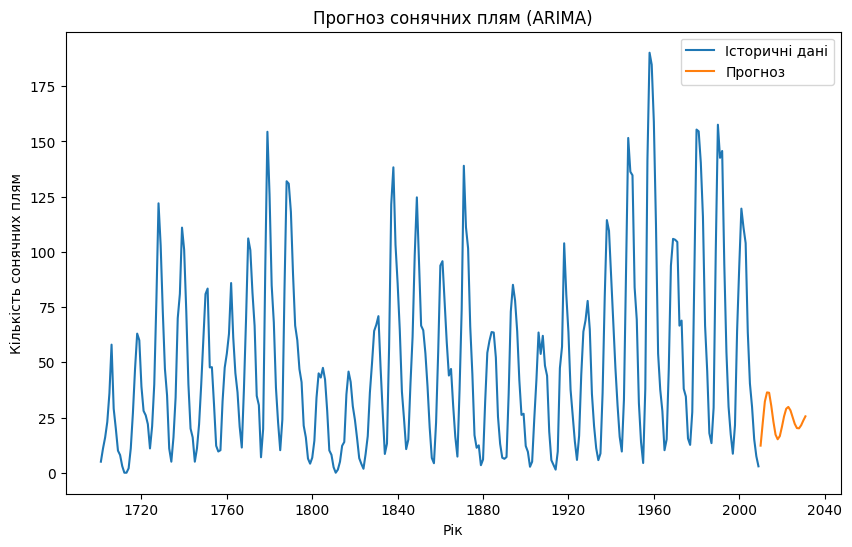

In [6]:
plt.figure(figsize=(10, 6))
plt.plot(ts, label='Історичні дані')
plt.plot(forecast_years, forecast, label='Прогноз')
plt.xlabel('Рік')
plt.ylabel('Кількість сонячних плям')
plt.title('Прогноз сонячних плям (ARIMA)')
plt.legend()
plt.show()